<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/Perceptron%E2%80%94%E2%80%94assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Perceptron 
##Definition
In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.

It is the First Neural Network which is invented in 1950s. It is inspired by actual neurons. 

### Advantages: 
1.  Its computation time is very fast.



### Disadvantages:
1. Single layer can be used only for simple problems

2. The output values of a perceptron can take on only one of two values (0 or 1) due to the hard-limit transfer function

3. Perceptrons can only classify linearly separable sets of vectors

<img src="https://www.allaboutcircuits.com/uploads/articles/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg" width="800" height="500">
 


## Algorithm:
* Input  is  a  n  dimensional  vector  x 
* Output is  a  label  y  ∈ {-1,  1}
* Activation = Weights * Inputs + Bias

* $$ \hat{y}_i =\left\{
\begin{aligned}
1  \textrm{  if  output }> 0  \\
0  \textrm{  if  output } < 0
\end{aligned}
\right.
$$

* If the prediction result does not match the real value, we need to update the weight and bias by using the learning rate $\alpha$ until the accuracy reached a certain criteria. 
---

---

## Data
In this assignment, we will explore the Perceptron algoritm on a dataset named "Red wine". It contains 1599 samples,12 columns. Download link is: [link](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality

## Packages
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   seaborn: [documentation](https://seaborn.pydata.org/)


---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


---

## Data Preprocessing

---

In [ ]:
wine = pd.read_csv('winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine.keys

<bound method NDFrame.keys of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [ ]:
data = wine[['density', 'alcohol', 'quality']]
data

,density,alcohol,quality
0,0.99780,9.4,5
1,0.99680,9.8,5
2,0.99700,9.8,5
3,0.99800,9.8,6
4,0.99780,9.4,5
...,...,...,...
1594,0.99490,10.5,5
1595,0.99512,11.2,6
1596,0.99574,11.0,6
1597,0.99547,10.2,5


In [ ]:
data['quality'] = np.where(data['quality'] > 6, 1, 0)
data['quality'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    1382
1     217
Name: quality, dtype: int64

Convert features to numpy array

In [ ]:
X = data[['density', 'alcohol']].to_numpy()

Add 1 to the X array as bias input

In [ ]:
X_bar = []
for x in X:
    X_bar.append(np.append(x,np.ones(1)))
X_bar=np.array(X_bar)
X_bar

array([[ 0.9978 ,  9.4    ,  1.     ],
       [ 0.9968 ,  9.8    ,  1.     ],
       [ 0.997  ,  9.8    ,  1.     ],
       ...,
       [ 0.99574, 11.     ,  1.     ],
       [ 0.99547, 10.2    ,  1.     ],
       [ 0.99549, 11.     ,  1.     ]])

Extract out labels and Convert labels to numpy array

In [ ]:
y = data['quality'].to_numpy()

---

Describe what the object iris is and tell the reader how to extract useful information for our task. 

In the following code cell, we extract our data to numpy arrays.


---

---

## Visualization of Data

Explain why visualization is import and discuss how in the below figure we can clearly see a separating line....

---

Text(0, 0.5, 'alcohol')

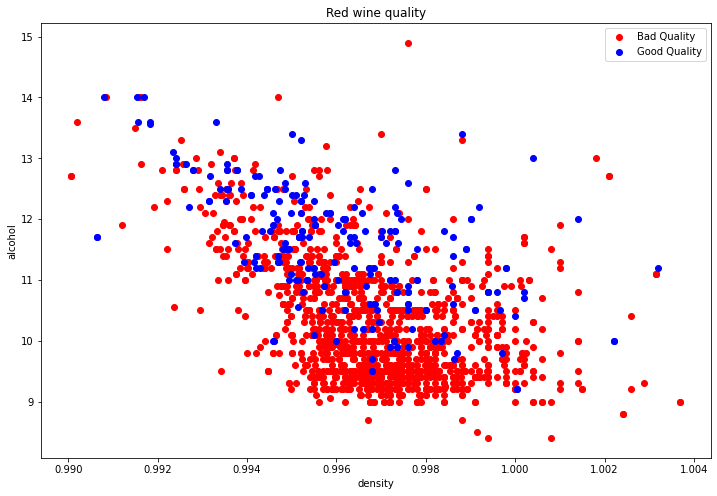

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X_bar[:,0][y == 0], X_bar[:,1][y == 0], label = "Bad Quality", color = 'red')
plt.scatter(X_bar[:,0][y == 1], X_bar[:,1][y == 1], label = "Good Quality", color = 'blue')
plt.legend()
plt.title('Red wine quality')
plt.xlabel('density')
plt.ylabel('alcohol')

---

Insert here an image of the perceptron drawn as a neuron....

how the algorithm works

we obviously need our acitvation function, the sign function, so we define this function in the following code cell. 




---

In [ ]:
def sign(x, y):
    ##the input vector here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
def L(w, features = X_bar, labels = y):
    return sum(0.5 *(sign(w, x ) - labels[i])**2 for i, x in enumerate(features))

---

## The Gradient Approximation Update Rule

Explain why this rule works!

$
w \rightarrow w - \alpha(\hat{y}^i - y^i)\hat{x}^i
$

---

In [ ]:
def grad_approx(w, x, y):
    return (sign(w, x) -y)*x

##Set epochs 
epochs = 1000

###Set alpha 
alpha = 0.5

###random initial weights 
w = np.random.rand(3)



In [ ]:
##Before 
L(w)
print(f'the loss before implementing stochastic approximate gradient descent ={L(w)}')

the loss before implementing stochastic approximate gradient descent =691.0


In [ ]:
losses = []
for _ in range(epochs):
    for _ in range(79):
        random_index = np.random.randint(1599)
        w = w - alpha * grad_approx(w, X_bar[random_index], y[random_index])
        ###print(f'Loss at epoch {_} = {L(w)}')
    losses.append(L(w))

In [ ]:
len(losses)

1000

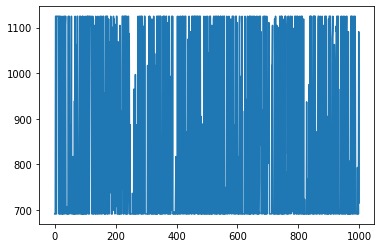

In [ ]:
plt.plot(losses)

According to the result above, it is obvious that the Perceptron method is not very suitable for this dataset since there are so many data points in this dataset and those data cannot be separated by a linear function.